# Coursera Course Analysis

This dataset contains mainly 6 columns and 890 course data. The detailed description:

- course_title : Contains the course title.
- course_organization : It tells which organization is conducting the courses.
- course_Certificate_type : It has details about what are the different certifications available in courses.
- course_rating : It has the ratings associated with each course.
- course_difficulty : It tells about how difficult or what is the level of the course.
- course_students_enrolled : It has the number of students that are enrolled in the course.

## The Structure of the notebook:
___________________________
**0. Analysis Objectives, Hypothesis, and Biases**

**1. Loading libraries and data. General dataset inspection.**
- 1.0. Loading libraries and data.
- 1.1. General dataset inspection

**2. Data Cleaning**
- 2.1. Handling missing values
- 2.2. Removing duplicate samples and features
- 2.3. Handling outliers
- 2.4. Checking values in categorical columns

**3. Exploratory Data Analysis (EDA)**
- 3.1. Unique values
  - 3.1.1. How many unique courses and organizations do we have?
  - 3.1.2.How many unique courses/specializations/professional certificates for each study level do we have?
- 3.2. Exploring the dataset with questions
  - 3.2.0. Defining functions for further visualizations:
  - 3.2.1. What course organizations are the most popular?
  - 3.2.2. What organizations have the most number of students enrolled in all their courses?
  - 3.2.3. What courses have the highest number of students enrolled?
  - 3.2.4. What courses are the most highly rated and what have the lowest rating?
  - 3.2.5. What organizations have the highest and the lowest average rating across their courses?
  - 3.2.6. What are the most popular words in course titles?
  - 3.2.7. What are the top courses and organizations in Data Science/ML, Data Analytics/Analysis, Python, and English?
- 3.3. Further Exploration of Correlations and Connections
  - 3.3.0. Defining functions for further visualizations
  - 3.3.1. Are course ratings and the number of enrolled students correlated?
  - 3.3.2. What difficulty levels get more students enrolled in its courses?

**4. Conclusions, Biases and Further Analysis**
- 4.1. Conclusions
- 4.2. Biases
- 4.3. Further Analysis

## 0. Analysis Objectives, Hypothesis, and Biases

### Objectives:
- perform data cleaning and preprocessing for further analysis
- perform Exploratory data analysis (EDA)
- check initial hypotheses
- support the analysis with data visualizations

### Hypotheses: 
- there is a correlation between the course rating the number of students enrolled
- the most popular course topic is Data Science

### Biases:
- The size of the dataset is small, thus its possible we get the wrong idea about the whole population of Coursera corses.
- There are courses in different languages, and thus, with different learner audiences. Analyzing all of them together may lead us to wrong conclusions about certain course organizations.
- Course rating may not be the best signifier of course quality. It would also be better to get the success/completion rate for each course.

## 1. Loading libraries and data

In [155]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [321]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from wordcloud import WordCloud
from varname import nameof
from sklearn.feature_extraction.text import CountVectorizer
from fuzzywuzzy import process
from pprint import pprint
import textwrap

sns.set_style("darkgrid")

<IPython.core.display.Javascript object>

In [355]:
data = pd.read_csv("coursea_data.csv", index_col=0)
data.reset_index(inplace=True)
del data["index"]

<IPython.core.display.Javascript object>

### 1.1. General dataset inspection

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.9+ KB


<IPython.core.display.Javascript object>

We can see that there is only one numeric column, though the column "course_students_enrolled" should be numeric as well. So, let's convert it:

In [357]:
# define a list of numeric columns names for further use
num_cols = ["course_rating", "course_students_enrolled"]

<IPython.core.display.Javascript object>

In [350]:
data.course_students_enrolled.str[-1].unique()  # we have numbers in thousands and millions

array(['k', 'm'], dtype=object)

<IPython.core.display.Javascript object>

In [359]:
def convert_str_to_float(s):
    """
    Function to convert strings
    like '1.2k' or '12m' into
    floats signifying thousands.
    """
    if s.endswith("k"):
        return float(s[:-1])
    elif s.endswith("m"):
        return float(s[:-1]) * 1000
    else:
        return float(s)

<IPython.core.display.Javascript object>

In [360]:
# convert strings to floats signifying thousands, e.g. "3.2m" will become 3200 (thousands)
data["course_students_enrolled"] = data["course_students_enrolled"].apply(
    convert_str_to_float
)

<IPython.core.display.Javascript object>

In [361]:
data[num_cols] = data[num_cols].round(2)

<IPython.core.display.Javascript object>

In [364]:
data.describe()

,course_rating,course_students_enrolled
count,891.000000,891.000000
mean,4.677329,90.552076
std,0.162225,181.936454
min,3.300000,1.500000
25%,4.600000,17.500000
50%,4.700000,42.000000
75%,4.800000,99.500000
max,5.000000,3200.000000


<IPython.core.display.Javascript object>

## 2. Data Cleaning

### 2.1. Handling missing values

<Axes: >

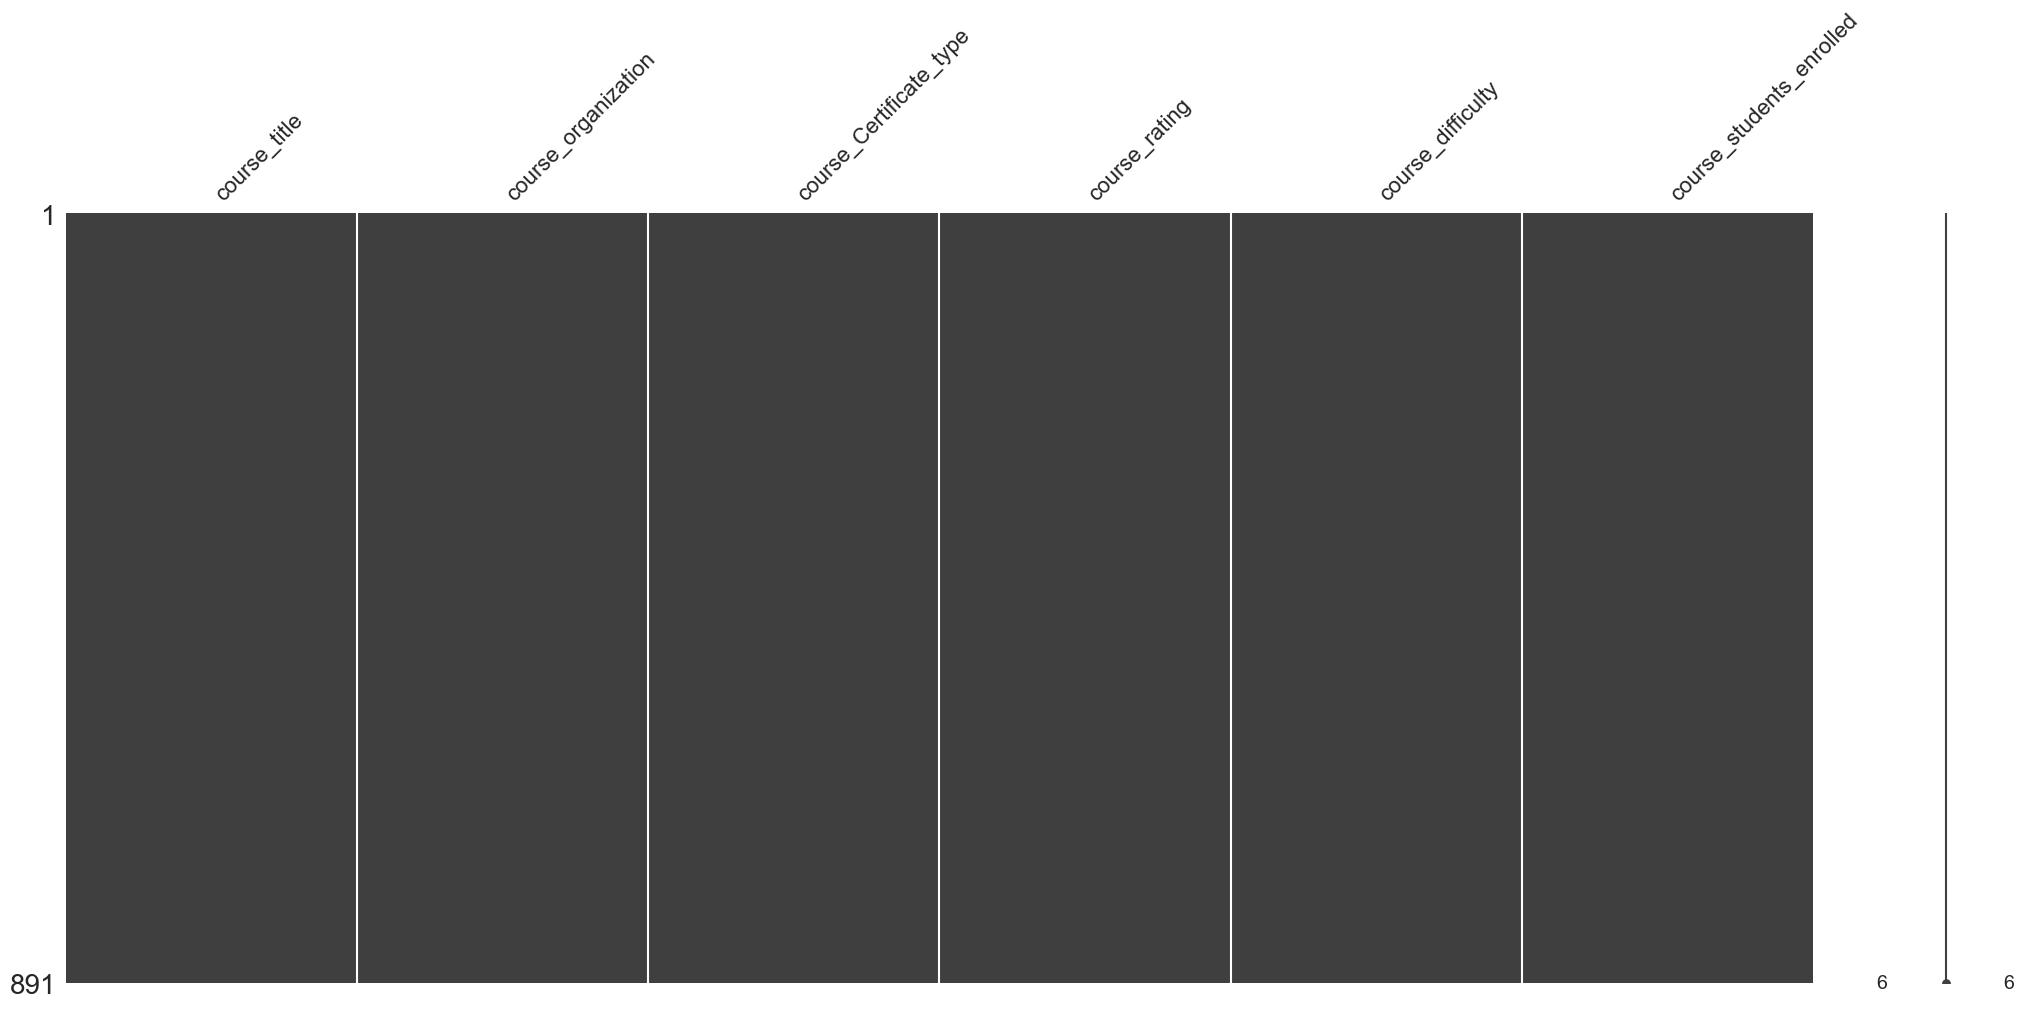

<IPython.core.display.Javascript object>

In [365]:
# matrix showing the location of missing values
msno.matrix(data)

<Axes: >

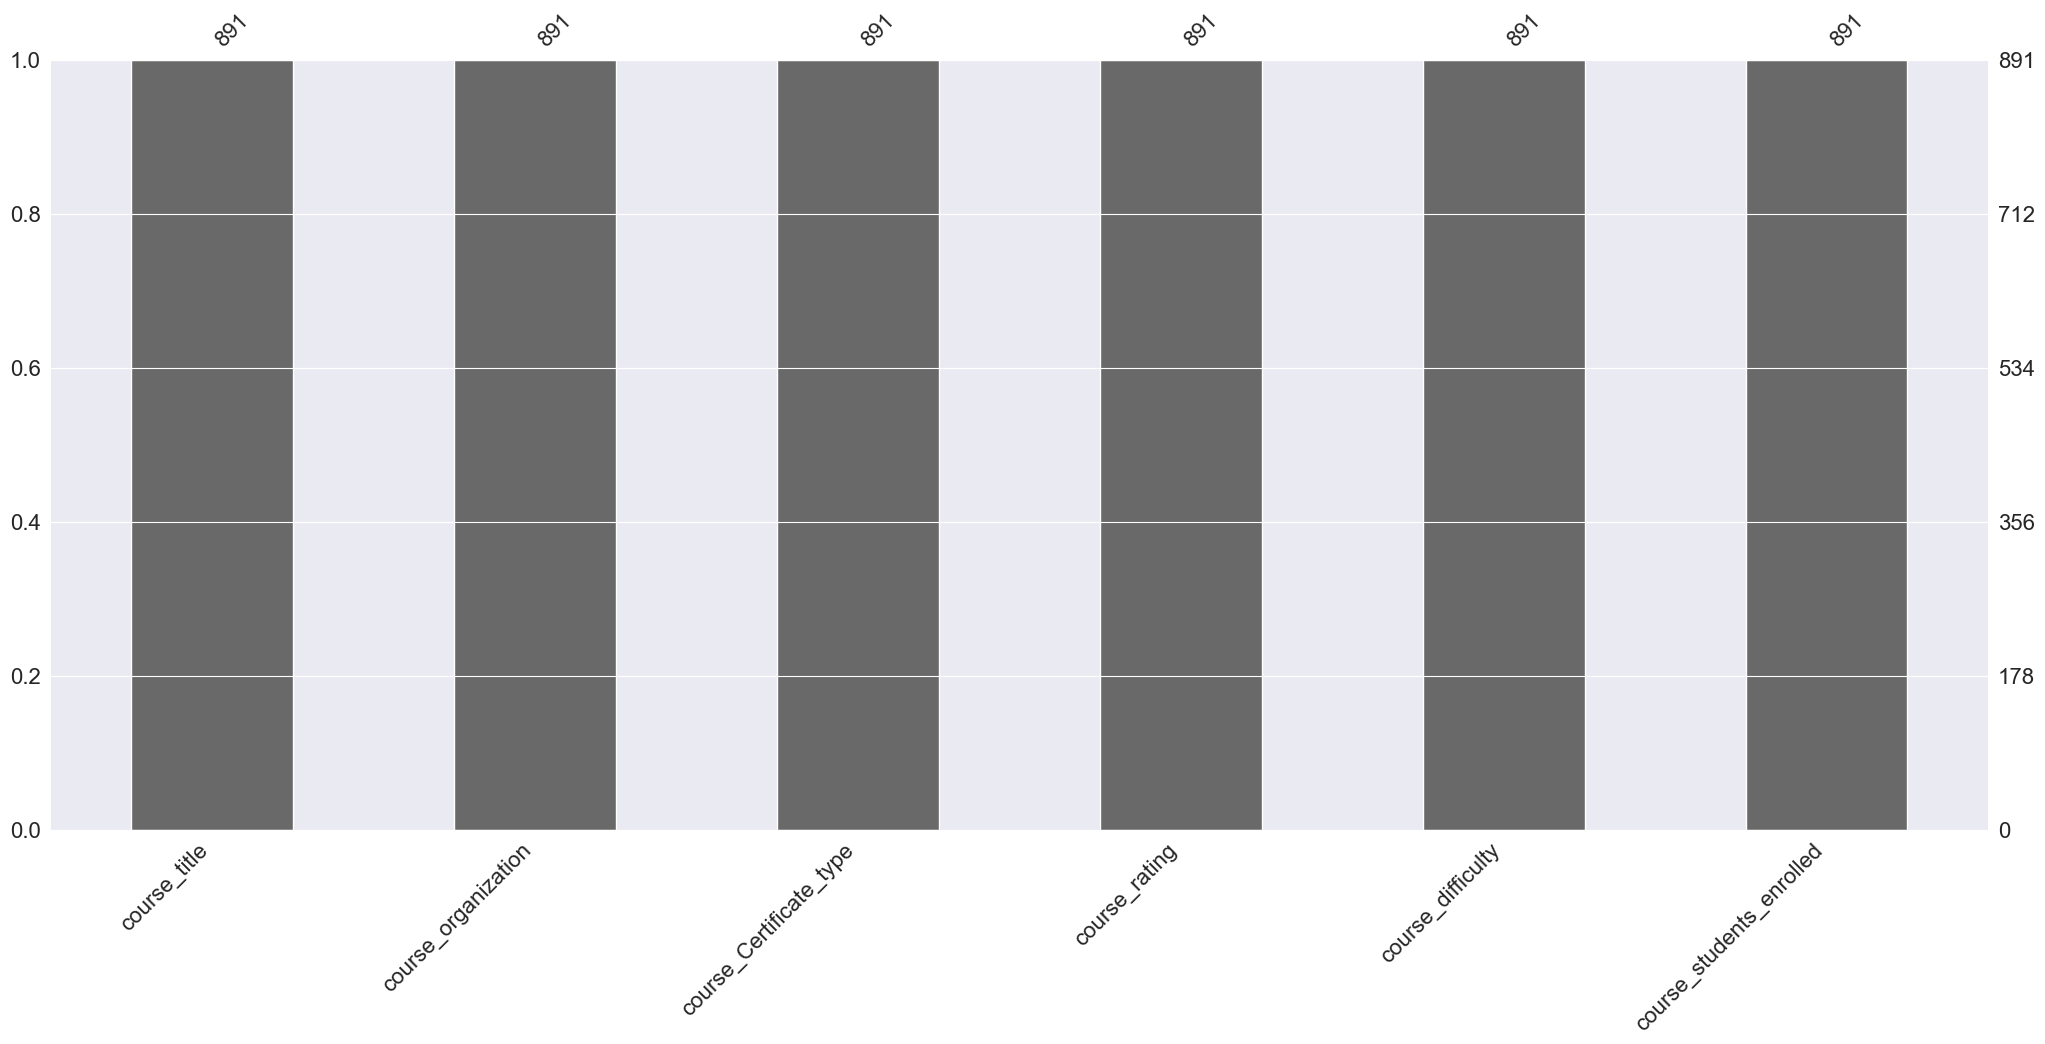

<IPython.core.display.Javascript object>

In [366]:
# bar plot showing the proportion of missing values
msno.bar(data)

In [367]:
# count missing values
data.isna().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

<IPython.core.display.Javascript object>

In [368]:
# proportion of missing values
data.isna().sum() / data.count()

course_title                0.0
course_organization         0.0
course_Certificate_type     0.0
course_rating               0.0
course_difficulty           0.0
course_students_enrolled    0.0
dtype: float64

<IPython.core.display.Javascript object>

##### Conclusion:
- There are no missing values in this dataset.

### 2.2. Removing duplicate samples and features

In [369]:
len(data) - len(data.drop_duplicates())  # count duplicate values

0

<IPython.core.display.Javascript object>

In [370]:
data[data.duplicated()]  # get duplicated rows

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled


<IPython.core.display.Javascript object>

In [371]:
len(data) == len(data.drop_duplicates())  # see if the length of data changes
                                          # when we drop duplicate values

True

<IPython.core.display.Javascript object>

In [372]:
len(data.columns.tolist()) == len(
    set(data.columns.tolist())
)  # see if there are duplicate columns

True

<IPython.core.display.Javascript object>

In [373]:
data.drop_duplicates(keep="first", inplace=True)  # drop duplicates if there are any

<IPython.core.display.Javascript object>

##### Conclusion:
- There are no duplicate values in this dataset.

### 2.3. Handling outliers

In [374]:
# check for numeric columns
data.select_dtypes(exclude=["object"]).columns.tolist()

['course_rating', 'course_students_enrolled']

<IPython.core.display.Javascript object>

In [375]:
# let's get general statistics about the two
# numeric columns that we have
data[num_cols].describe()

,course_rating,course_students_enrolled
count,891.000000,891.000000
mean,4.677329,90.552076
std,0.162225,181.936454
min,3.300000,1.500000
25%,4.600000,17.500000
50%,4.700000,42.000000
75%,4.800000,99.500000
max,5.000000,3200.000000


<IPython.core.display.Javascript object>

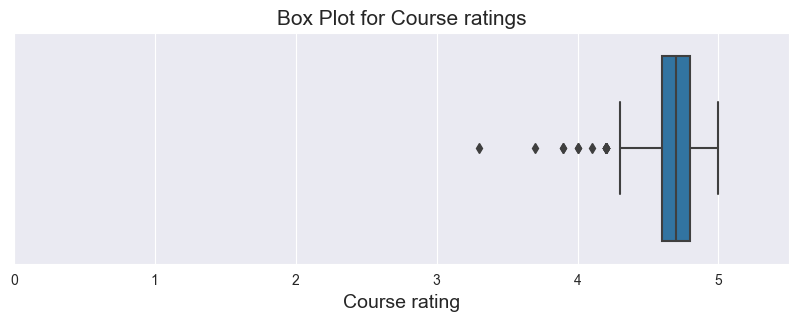

<IPython.core.display.Javascript object>

In [376]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=data.course_rating)
plt.title("Box Plot for Course ratings", fontsize=15)
plt.xlabel("Course rating", fontsize=14)
plt.xlim(0, 5.5)
plt.show()

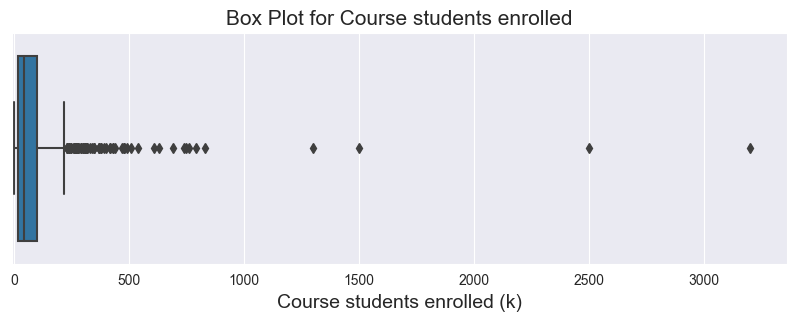

<IPython.core.display.Javascript object>

In [377]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=data.course_students_enrolled)
plt.title("Box Plot for Course students enrolled", fontsize=15)
plt.xlabel("Course students enrolled (k)", fontsize=14)
plt.xlim(
    -10,
)
plt.show()

##### Conclusions:
- We have only two numeric columns (course_rating and course_students_enrolled). 
- There are some outliers in both columns, but those values are in an acceptable ranges for these features (ratings from 0 to 5 and positive number of students), so it's sensible to keep the outliers in the dataset for further analysis.

### 2.4. Checking values in categorical columns

In [378]:
categorical_columns = data.select_dtypes(include=["object"]).columns.tolist()
categorical_columns

['course_title',
 'course_organization',
 'course_Certificate_type',
 'course_difficulty']

<IPython.core.display.Javascript object>

In [379]:
# let's print out unique values for each column
# (excluding the course_title) for visual inspection
# for unusual entries
for feature in categorical_columns[1:]:
    print(data[feature].unique())
    print("-" * 50)

['(ISC)²' 'University of Pennsylvania' 'Johns Hopkins University'
 'Yale University' 'Indian School of Business' 'University at Buffalo'
 'deeplearning.ai' 'IBM' 'Amazon Web Services' 'University of Toronto'
 'University of California, Irvine'
 'University of Illinois at Urbana-Champaign' 'University of Michigan'
 'Universidad Nacional Autónoma de México'
 'University of Colorado Boulder'
 'National Research University Higher School of Economics' 'Google Cloud'
 'Erasmus University Rotterdam' 'Duke University' 'University of Virginia'
 'Atlassian' 'ScrumTrek' 'University of California San Diego'
 'Stanford University' 'University of Colorado System'
 'Copenhagen Business School' 'Macquarie University'
 'Vanderbilt University' 'The University of Edinburgh'
 'Technical University of Denmark (DTU)' 'Universidad Austral'
 'Arizona State University' 'The Museum of Modern Art'
 'National Arts Strategies' 'Università Bocconi'
 'Pontificia Universidad Católica de Chile'
 'University of Califor

<IPython.core.display.Javascript object>

##### Conclusions:
- By visual inspection of the unique values for categorical columns, we can see that there are no abnormal entries. 

## 3. Exploratory Data Analysis (EDA)

### 3.1. Unique values

#### 3.1.1. How many unique courses and organizations do we have?

In [380]:
data[["course_title", "course_organization"]].nunique()

course_title           888
course_organization    154
dtype: int64

<IPython.core.display.Javascript object>

We can see that the number of unique course titles doesn't match the overall number of courses (891). It means we have the same course titles. Let's investigate more into this: 

In [381]:
v_count = data["course_title"].value_counts()
v_count[v_count > 1]

Developing Your Musicianship    2
Marketing Digital               2
Machine Learning                2
Name: course_title, dtype: int64

<IPython.core.display.Javascript object>

In [382]:
data[data["course_title"] == "Developing Your Musicianship"]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
224,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41.0
225,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54.0


<IPython.core.display.Javascript object>

In [383]:
data[data["course_title"] == "Marketing Digital"]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
582,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81.0
583,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39.0


<IPython.core.display.Javascript object>

In [384]:
data[data["course_title"] == "Machine Learning"]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
563,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290.0
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200.0


<IPython.core.display.Javascript object>

##### Conclusions:
- There are 888 unique course titles (891 unique courses) and 154 unique course organizations.
- There are three course titles that appear twice, but are not duplicates. Though, the course title "Developing Your Musicianship" appears to signify course and specialization from the same organization. We can assume that the course could be a part of the specialization, but we lack information to dismiss or combine these two entries. They may as well be different courses with separate number of enrolled students. 
Thus, we will leave everything as it is in our dataset, but will keep this in mind for future analysis.

#### 3.1.2.How many unique courses/specializations/professional certificates for each study level do we have?

In [385]:
courses = data.loc[data["course_Certificate_type"] == "COURSE"]
specializations = data.loc[data["course_Certificate_type"] == "SPECIALIZATION"]
certificates = data.loc[data["course_Certificate_type"] == "PROFESSIONAL CERTIFICATE"]

for i in ["courses", "certificates", "specializations"]:
    num_unique = eval(f'{i}["course_title"].unique().size')
    print(f"Number of unique {i}: {num_unique}")

Number of unique courses: 582
Number of unique certificates: 12
Number of unique specializations: 297


<IPython.core.display.Javascript object>

In [386]:
grouped_data = data.groupby(["course_Certificate_type", "course_difficulty"]).size()
grouped_data

course_Certificate_type   course_difficulty
COURSE                    Advanced               9
                          Beginner             282
                          Intermediate         104
                          Mixed                187
PROFESSIONAL CERTIFICATE  Beginner               9
                          Intermediate           3
SPECIALIZATION            Advanced              10
                          Beginner             196
                          Intermediate          91
dtype: int64

<IPython.core.display.Javascript object>

In [387]:
difficulty_count = data.groupby(["course_difficulty"]).size().sort_values()
difficulty_count

course_difficulty
Advanced         19
Mixed           187
Intermediate    198
Beginner        487
dtype: int64

<IPython.core.display.Javascript object>

The majority of courses in our dataset have Beginner difficulty. Thus, let's get a dataframe with only beginner courses for further analysis:

In [388]:
beginner_data = data[data["course_difficulty"] == "Beginner"]

<IPython.core.display.Javascript object>

Let's visualize the shares of course types in the dataset, and difficulty levels for each course type:

In [389]:
# plotly express figure with Sunburst plot
fig = px.sunburst(
    grouped_data.reset_index(name="count"),
    path=["course_Certificate_type", "course_difficulty"],
    values="count",
    color="course_difficulty",
    title="Number of observations for each course type and difficulty level within (Interactive)",
)
fig.show()

<IPython.core.display.Javascript object>

##### Conclusions:
- There are 582 unique courses:
    - 282 Beginner
    - 104 Intermediate
    - 187 Mixed
    - 9 Advanced
- There are 12 unique professional certificates:
    - 9 Beginner
    - 3 Intermediate
    - 10 Advanced
- There are 297 unique specializations:
    - 196 Beginner
    - 91 Intermediate
    - 10 Advanced
    
- Overall, there are:
    - 487 Beginner courses/certificates/specializations
    - 198 Intermediate courses/certificates/specializations
    - 19 Advanced courses/certificates/specializations
    - 187 Mixed courses/certificates/specializations
    

### 3.2. Exploring the dataset with questions

#### 3.2.0. Defining functions for further visualizations:

In [390]:
xticklabels_d = {
    "horizontalalignment": "right",
    "fontweight": "light",
    "fontsize": "x-large",
}

<IPython.core.display.Javascript object>

In [391]:
def plot_sns_barplot(
    data,
    x: str,
    y: str,
    x_label: str,
    y_label: str,
    title: str,
    hue=None,
    xtick_rot: int = 65,
    max_len_xtick_labels: int = 25,
    xticklabels: dict = xticklabels_d,
    my_figsize: (int, int) = (10, 7)):
    """
    Function to automate seaborn
    barplot plotting.
    """
    # Figure Size
    fig = plt.figure(figsize=my_figsize)

    # Bar Plot
    ax = sns.barplot(x=data[x], y=data[y], hue=hue)
    f = lambda x: textwrap.fill(x.get_text(), max_len_xtick_labels)
    ax.set_xticklabels(map(f, ax.get_xticklabels()), rotation=xtick_rot, **xticklabels)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    ax.plot()

<IPython.core.display.Javascript object>

In [392]:
def plot_sns_countplot(
    data,
    x: str,
    plot_order,
    x_label: str,
    y_label: str,
    title: str,
    xtick_rot: int = 65,
    max_len_xtick_labels: int = 25,
    xticklabels: dict = xticklabels_d,
    my_figsize: (int, int) = (10, 7)):
    """
    Function to automate seaborn
    countplot plotting.
    """
    plt.figure(figsize=my_figsize)
    ax = sns.countplot(data=data, x=x, order=plot_order)
    f = lambda x: textwrap.fill(x.get_text(), max_len_xtick_labels)
    ax.set_xticklabels(map(f, ax.get_xticklabels()), rotation=xtick_rot, **xticklabels)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    ax.plot()

<IPython.core.display.Javascript object>

In [393]:
def plot_wordcloud(data, top_words: int = 50):
    """
    Function to use CountVectorizer to
    visualize top words in a course titles
    as a word cloud.
    """

    # get unique course titles
    series_variable = pd.Series(data["course_title"].unique())

    # convert titles into lower case
    series_variable = series_variable.str.lower()

    # get word frequencies excluding the most common structures in English
    vectorizer = CountVectorizer(stop_words="english")
    word_count = vectorizer.fit_transform(series_variable)
    words_list = vectorizer.get_feature_names_out()
    counts_list = word_count.toarray().sum(axis=0)

    # get a list of tuples with first n most used words
    most_used_words = sorted(
        zip(words_list, counts_list), key=lambda x: x[1], reverse=True
    )[:top_words]

    # Generate a word cloud image
    text = " ".join([i[0] for i in most_used_words])
    wordcloud = WordCloud(stopwords=None, background_color="white").generate(text)

    # Display the generated image
    # with top-n words
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>

#### 3.2.1. What course organizations are the most popular?

In [394]:
most_pop_organizations = data["course_organization"].value_counts().head(10)
most_pop_organizations

University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Johns Hopkins University                      28
Duke University                               28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Colorado Boulder                19
Name: course_organization, dtype: int64

<IPython.core.display.Javascript object>

In [395]:
most_pop_organizations_beginner = (
    beginner_data["course_organization"].value_counts().head(10)
)
most_pop_organizations_beginner

University of Pennsylvania          28
University of Michigan              19
University of Virginia              18
Johns Hopkins University            17
IBM                                 16
Duke University                     16
University of California, Irvine    15
University of California, Davis     14
University of Colorado Boulder      11
University of Colorado System       10
Name: course_organization, dtype: int64

<IPython.core.display.Javascript object>

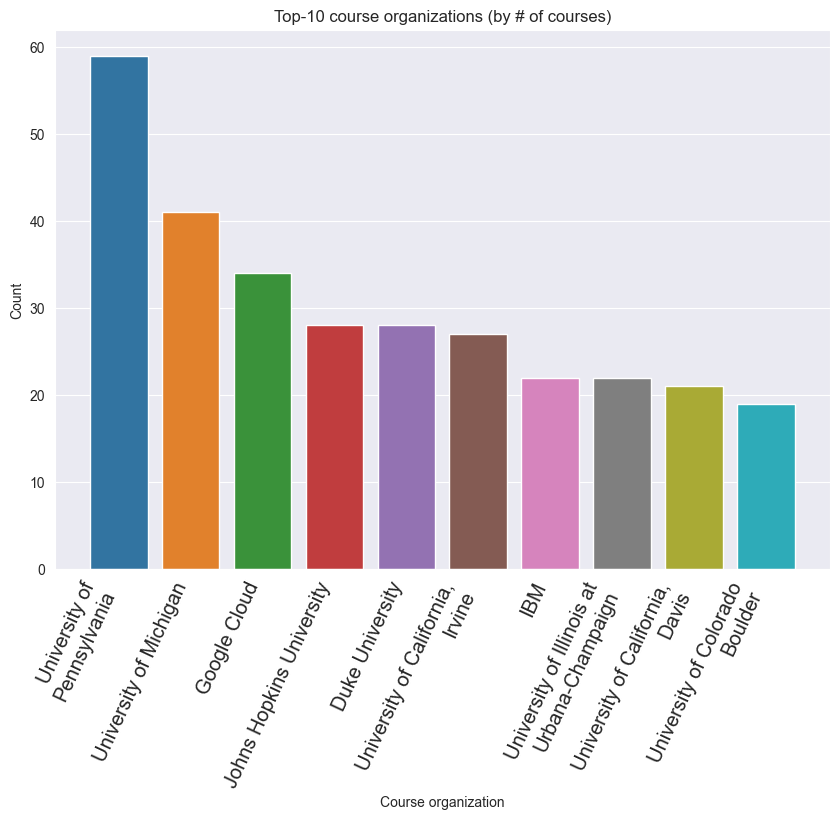

<IPython.core.display.Javascript object>

In [396]:
# get top-10 organizations based on number of courses
order = data["course_organization"].value_counts().iloc[:10].index
# plot the top-10 course organizations
plot_sns_countplot(
    data,
    x="course_organization",
    plot_order=order,
    x_label="Course organization",
    y_label="Count",
    title="Top-10 course organizations (by # of courses)",
)

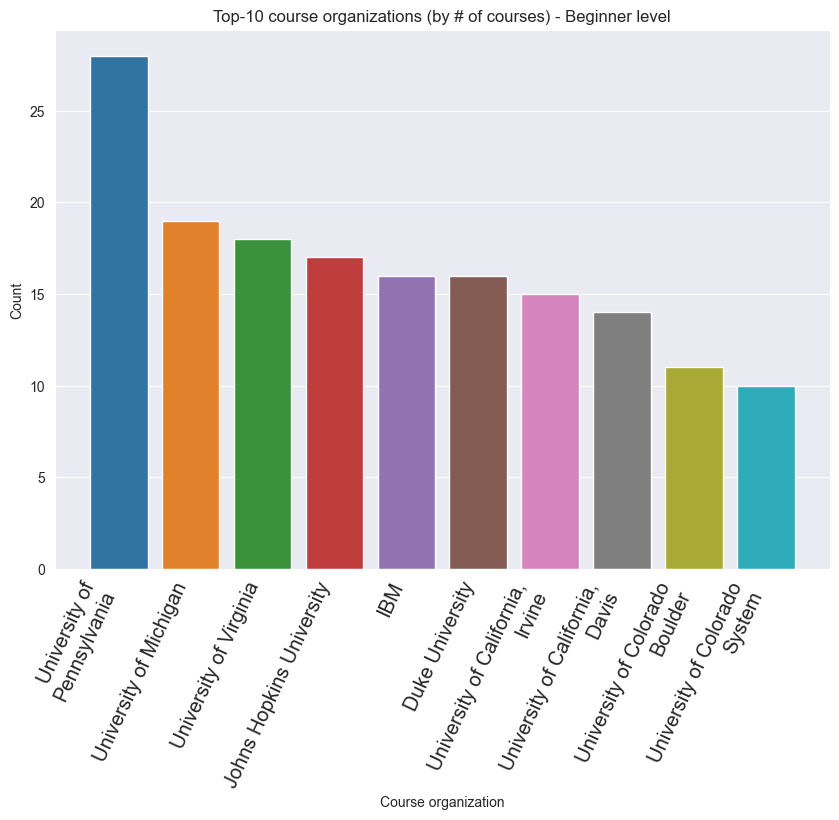

<IPython.core.display.Javascript object>

In [397]:
# get top-10 organizations based on number of courses
order = beginner_data["course_organization"].value_counts().iloc[:10].index
# plot the top-10 course organizations
plot_sns_countplot(
    beginner_data,
    x="course_organization",
    plot_order=order,
    x_label="Course organization",
    y_label="Count",
    title="Top-10 course organizations (by # of courses) - Beginner level",
)

##### Conclusions:
- The top-10 organizations based on the number of courses in our dataset are:
    - University of Pennsylvania 
    - University of Michigan
    - Google Cloud
    - Johns Hopkins University
    - Duke University 
    - University of California, Irvine
    - IBM
    - University of Illinois at Urbana-Champaign 
    - University of California, Davis 
    - University of Colorado Boulder  

#### 3.2.2. What organizations have the most number of students enrolled in all their courses?

**Let's see the distribution of the number of enrolled students across the courses:**

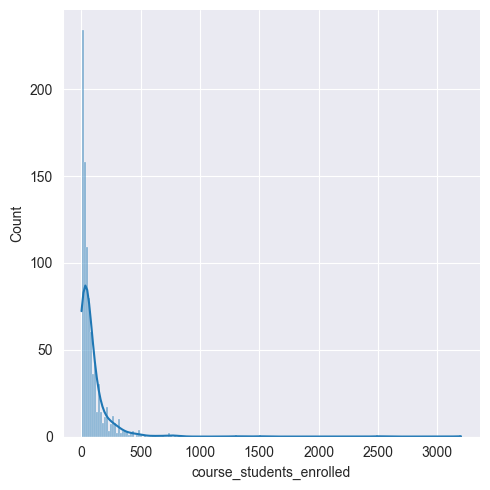

<IPython.core.display.Javascript object>

In [398]:
sns.displot(data.course_students_enrolled, kde=True)

**Based on the plot above, we can tell that most courses usually have less than 100 thousands students enrolled.**

In [399]:
popular_organizations = (
    data.groupby(["course_organization"])
    .sum(numeric_only=True)
    .nlargest(10, "course_students_enrolled")["course_students_enrolled"]
    .reset_index()
)
popular_organizations

,course_organization,course_students_enrolled
0,University of Michigan,7437.7
1,University of Pennsylvania,5501.3
2,Stanford University,4854.0
3,"University of California, Irvine",4326.0
4,Johns Hopkins University,4298.9
5,Duke University,3967.6
6,Yale University,3952.0
7,IBM,2956.4
8,deeplearning.ai,2863.4
9,Google Cloud,2604.3


<IPython.core.display.Javascript object>

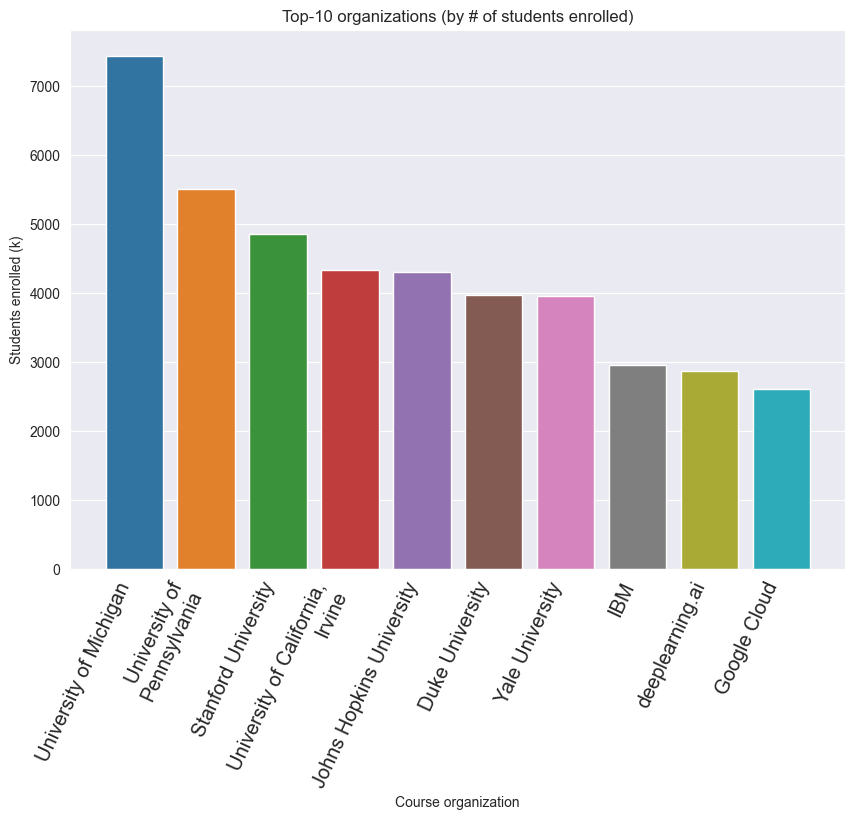

<IPython.core.display.Javascript object>

In [400]:
plot_sns_barplot(
    popular_organizations,
    x="course_organization",
    y="course_students_enrolled",
    x_label="Course organization",
    y_label="Students enrolled (k)",
    title="Top-10 organizations (by # of students enrolled)",
)

In [401]:
popular_organizations_median = (
    data.groupby(["course_organization"])
    .median(numeric_only=True)
    .nlargest(10, "course_students_enrolled")["course_students_enrolled"]
    .reset_index()
)
popular_organizations_median

,course_organization,course_students_enrolled
0,McMaster University,230.0
1,Google - Spectrum Sharing,210.0
2,Ludwig-Maximilians-Universität München (LMU),192.5
3,École Polytechnique,190.0
4,University of California San Diego,150.0
5,Duke University,135.0
6,The University of North Carolina at Chapel Hill,130.0
7,PwC,120.0
8,University of Washington,120.0
9,Vanderbilt University,120.0


<IPython.core.display.Javascript object>

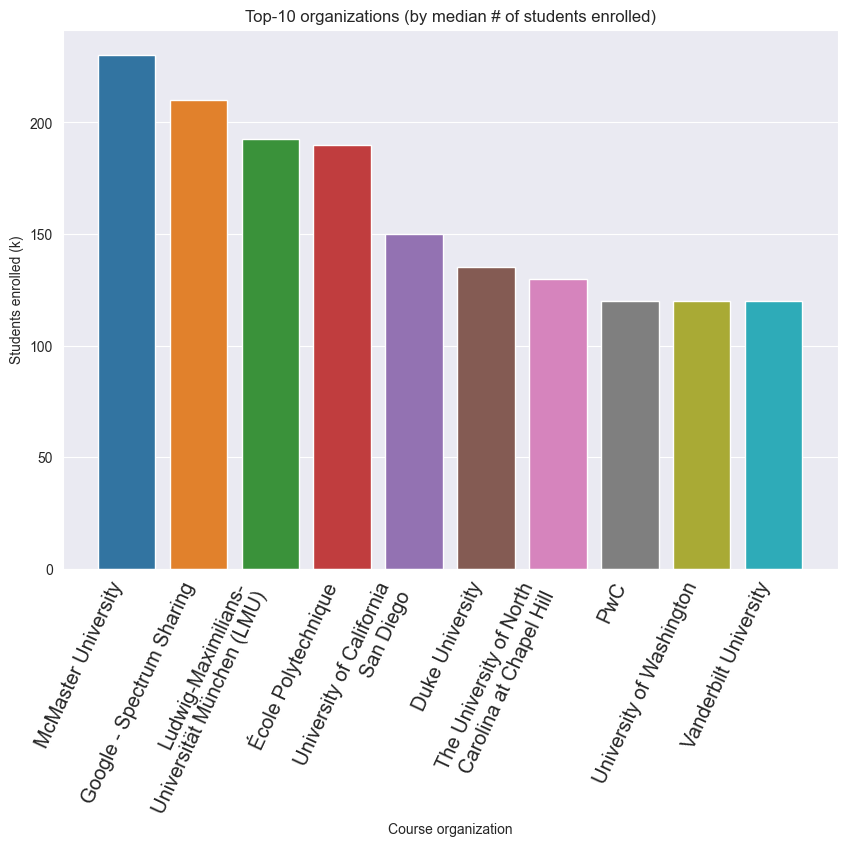

<IPython.core.display.Javascript object>

In [402]:
plot_sns_barplot(
    popular_organizations_median,
    x="course_organization",
    y="course_students_enrolled",
    x_label="Course organization",
    y_label="Students enrolled (k)",
    title="Top-10 organizations (by median # of students enrolled)",
)

##### Conclusions:
- The top-5 organizations based on students enrolled in all courses are:
    - University of Michigan
    - University of Pennsylvania
    - Stanford University
    - University of California, Irvine	
- Most organizations in top-10 based on number of courses are also in the top-10 based on the number of students enrolled. These organizations have the biggest learner communities.
- If we analyze organizations based on the median number of enrolled students, the top-5 organizations include:
    - McMaster University
    - Google - Spectrum Sharing
    - Ludwig-Maximilians-Universität München (LMU)
    - École Polytechnique
    - University of California San Diego

Here we have chosen to use median since organization having one extremely popular course would drag the mean up. And that would give us a wrong idea about the number of students that usually sign up for their courses.

#### 3.2.3. What courses have the highest number of students enrolled?

In [403]:
popular_courses = data.nlargest(10, "course_students_enrolled")
popular_beginner_courses = beginner_data.nlargest(10, "course_students_enrolled")

<IPython.core.display.Javascript object>

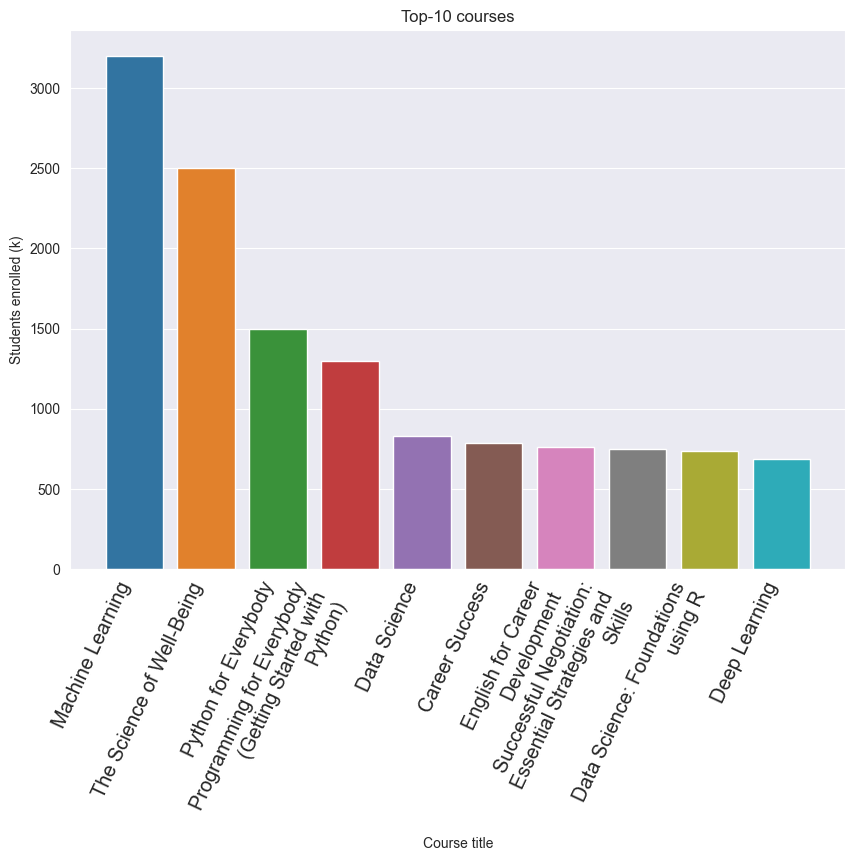

<IPython.core.display.Javascript object>

In [404]:
# visualize the bar plot for all courses
plot_sns_barplot(
    popular_courses,
    x="course_title",
    y="course_students_enrolled",
    x_label="Course title",
    y_label="Students enrolled (k)",
    title="Top-10 courses",
)

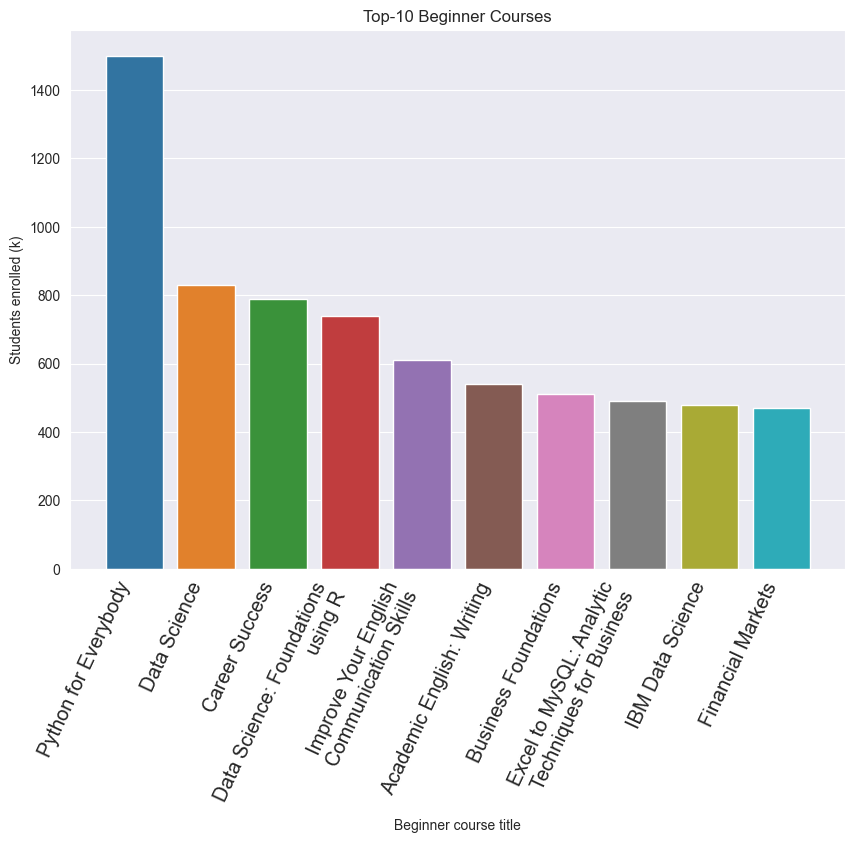

<IPython.core.display.Javascript object>

In [405]:
# visualize the bar plot for beginner courses
plot_sns_barplot(
    popular_beginner_courses,
    x="course_title",
    y="course_students_enrolled",
    x_label="Beginner course title",
    y_label="Students enrolled (k)",
    title="Top-10 Beginner Courses",
)

##### Conclusions:
- We can support our initial hypothesis that Data Science course is the most popular in this dataset.
- The top-10 courses based on the number of students enrolled are:
    - Machine Learning
    - The Science of Well-Being
    - Python for Everybody
    - Programming for Everybody (Getting Started with Python)
    - Data Science
    - Career Success
    - English for Career Development
    - Successful Negotiation: Essential Strategies and Skills
    - Data Science: Foundations using R
    - Deep Learning
    
- In the top-10, there are: 
    - 4 courses that are connected to data science
    - 1 course on English language skills
    - 3 courses on well-being, career, negotiation
    - 2 course in programming in Python
    
- When analyzing only beginner courses, most courses are similar. The top-3 most popular Beginner courses are:
    - Python for Everybody
    - Data Science
    - Career Success
- Additionally, there are some courses that are only in the top-10 Beginner courses list. For example:
    - Excel to MySQL
    - IBM Data Science
    - Financial Markets

#### 3.2.4. What courses are the most highly rated and what have the lowest rating?

**First of all, let's see the distribution of course ratings:**

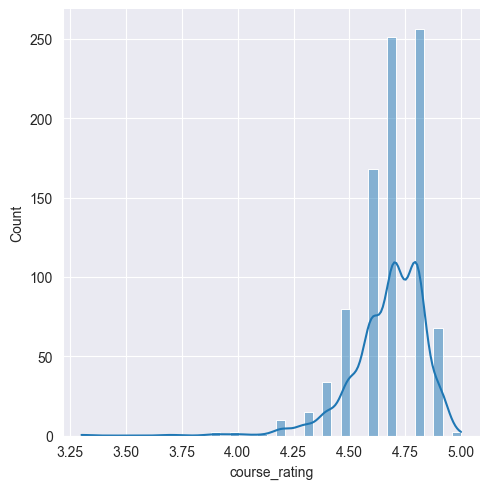

<IPython.core.display.Javascript object>

In [406]:
sns.displot(data.course_rating, kde=True)

**We can see that the majority of ratings are arount 4.5. Let's investigate more:**

In [407]:
selected_columns = [
    "course_title",
    "course_rating",
    "course_organization",
    "course_students_enrolled",
]

<IPython.core.display.Javascript object>

In [408]:
def get_top_k_courses(data, k: int, ratings: str, selected_cols=selected_columns):
    """
    Function to get a Pandas dataframe with
    top-k entries with largest or smallest
    rating.
    Inputs: data - Pandas dataframe,
            k: int - top-k entries,
            ratings: str - "largest" or "smallest".
    Outputs: filtered Pandas dataframe.
    """
    if ratings == "largest":
        highest_rated_courses = data.nlargest(k, "course_rating")[selected_cols]
        highest_rated_courses = highest_rated_courses.sort_values(
            by=["course_students_enrolled", "course_rating"], ascending=False
        )
        return highest_rated_courses
    elif ratings == "smallest":
        lowest_rated_courses = data.nsmallest(k, "course_rating")[selected_cols]
        # sorting the lowest rated courses by num of enrolled students
        lowest_rated_courses = lowest_rated_courses.sort_values(
            by=["course_rating", "course_students_enrolled"], ascending=True
        )
        return lowest_rated_courses
    else:
        print("You can choose only 'smallest' or 'largest' for the ratings argument")
        return None

<IPython.core.display.Javascript object>

In [409]:
# the most highly rated courses
get_top_k_courses(data, 15, "largest")

,course_title,course_rating,course_organization,course_students_enrolled
162,Convolutional Neural Networks,4.9,deeplearning.ai,240.0
124,COVID-19 Contact Tracing,4.9,Johns Hopkins University,220.0
82,Become a CBRS Certified Professional Installer...,4.9,Google - Spectrum Sharing,210.0
61,Aprendiendo a aprender: Poderosas herramientas...,4.9,University of California San Diego,180.0
65,Arizona State University TESOL,4.9,Arizona State University,150.0
103,Build a Modern Computer from First Principles:...,4.9,Hebrew University of Jerusalem,95.0
99,"Brand Management: Aligning Business, Brand and...",4.9,London Business School,57.0
40,American Contract Law I,4.9,Yale University,18.0
102,Bugs 101: Insect-Human Interactions,4.9,University of Alberta,15.0
36,Agile и Scrum в работе над проектами и продуктами,4.9,ScrumTrek,12.0


<IPython.core.display.Javascript object>

In [410]:
# the lowest rated courses
get_top_k_courses(data, 15, "smallest")

,course_title,course_rating,course_organization,course_students_enrolled
413,How To Create a Website in a Weekend! (Project...,3.3,The State University of New York,140.0
566,Machine Learning and Reinforcement Learning in...,3.7,New York University,29.0
569,Machine Learning for Trading,3.9,Google Cloud,15.0
873,iOS App Development with Swift,3.9,University of Toronto,76.0
522,"Introduction to Trading, Machine Learning & GCP",4.0,New York Institute of Finance,13.0
598,Mathematics for Machine Learning: PCA,4.0,Imperial College London,33.0
414,How to Start Your Own Business,4.1,Michigan State University,34.0
640,Optical Engineering,4.2,University of Colorado Boulder,6.2
59,Aprende a programar con Python,4.2,Universidad Austral,6.6
402,Hardware Description Languages for FPGA Design,4.2,University of Colorado Boulder,7.4


<IPython.core.display.Javascript object>

And how about only Beginner courses?

In [444]:
# the most highly rated beginner courses
get_top_k_courses(beginner_data, 15, "largest")

,course_title,course_rating,course_organization,course_students_enrolled
291,Excel Skills for Business,4.9,Macquarie University,240.0
124,COVID-19 Contact Tracing,4.9,Johns Hopkins University,220.0
61,Aprendiendo a aprender: Poderosas herramientas...,4.9,University of California San Diego,180.0
65,Arizona State University TESOL,4.9,Arizona State University,150.0
290,Everyday Parenting: The ABCs of Child Rearing,4.9,Yale University,86.0
99,"Brand Management: Aligning Business, Brand and...",4.9,London Business School,57.0
250,Egiptología (Egyptology),4.9,Universitat Autònoma de Barcelona,46.0
237,Diseño y Creación de un Emprendimiento Social,4.9,Pontificia Universidad Católica de Chile,21.0
40,American Contract Law I,4.9,Yale University,18.0
102,Bugs 101: Insect-Human Interactions,4.9,University of Alberta,15.0


<IPython.core.display.Javascript object>

In [412]:
# the lowest rated beginner courses
get_top_k_courses(beginner_data, 15, "smallest")

,course_title,course_rating,course_organization,course_students_enrolled
414,How to Start Your Own Business,4.1,Michigan State University,34.0
59,Aprende a programar con Python,4.2,Universidad Austral,6.6
844,Unity XR: How to Build AR and VR Apps,4.2,Unity,12.0
676,Project Execution,4.2,"University of California, Irvine",70.0
182,Cybersecurity and Its Ten Domains,4.2,University System of Georgia,140.0
13,AWS Fundamentals: Addressing Security Risk,4.3,Amazon Web Services,11.0
601,Memoir and Personal Essay: Write About Yourself,4.3,Wesleyan University,13.0
479,Introduction to Computer Programming,4.3,"Goldsmiths, University of London",20.0
548,Learn English,4.3,Tsinghua University,22.0
856,Virtual Teacher,4.3,"University of California, Irvine",23.0


<IPython.core.display.Javascript object>

##### Conclusions:
- We have analyzed course ratings to see what courses have largest and lowest ratings. Additionally we looked into the number of students enrolled to find the most loved and critisized courses in our dataset.
- Based on our data, we can tell that many learners **highly rated** these courses:
    - Machine Learning (Stanford University)    
    - Convolutional Neural Networks (deeplearning.ai)
    - COVID-19 Contact Tracing (Johns Hopkins University)
    - Become a CBRS Certified Professional Installer by Google (Google - Spectrum Sharing)
    - Aprendiendo a aprender...(Learning How to Learn) (University of California San Diego)
    - Arizona State University TESOL (Arizona State University)
- And many learners rated these courses **the lowest** (lowest rating being 3.3 out of 5):
    - How To Create a Website in a Weekend! (Project-Centered Course) (The State University of New York)
    - Machine Learning and Reinforcement Learning in Finance (New York University)
    - Machine Learning for Trading (Google Cloud)
    - iOS App Development with Swift (University of Toronto)
--------------
- As for only **Beginner courses**, these courses were rated **the highest** by many students:
    - Excel Skills for Business (Macquarie University)
    - COVID-19 Contact Tracing (Johns Hopkins University)
    - Aprendiendo a aprender...(Learning How to Learn) (University of California San Diego)
    - Arizona State University TESOL (Arizona State University)
- And these **Beginner courses** were rated **the lowest** by a significant amount of students (the lowest rating is 4.1/5):
    - Cybersecurity and Its Ten Domains (University System of Georgia)
    - Project Execution (University of California, Irvine)
    - How to Start Your Own Business (Michigan State University)

#### 3.2.5. What organizations have the highest and the lowest average rating across their courses?

In [413]:
def get_top_organizations_by_mean_rating(data, k: int, ratings: str):
    """
    Function to get a Pandas dataframe with
    top-k organizations with largest or smallest
    mean rating.
    Inputs: data - Pandas dataframe,
            k: int - top-k entries,
            ratings: str - "largest" or "smallest".
    Outputs: filtered Pandas dataframe.
    """
    mean_ratings_organizations = (
        data.groupby(["course_organization"]).mean(numeric_only=True).reset_index()
    )
    mean_ratings_organizations = mean_ratings_organizations[
        ["course_organization", "course_rating"]
    ].round(2)

    if ratings == "largest":
        return mean_ratings_organizations.nlargest(k, "course_rating")
    elif ratings == "smallest":
        return mean_ratings_organizations.nsmallest(k, "course_rating")
    else:
        print("You can choose only 'smallest' or 'largest' for the ratings argument")
        return None

<IPython.core.display.Javascript object>

In [414]:
get_top_organizations_by_mean_rating(data, 10, "largest")

,course_organization,course_rating
19,Crece con Google,4.90
33,Google - Spectrum Sharing,4.90
36,Hebrew University of Jerusalem,4.90
51,London Business School,4.90
61,"Nanyang Technological University, Singapore",4.90
83,ScrumTrek,4.90
112,Universidade Estadual de Campinas,4.90
113,Universidade de São Paulo,4.87
95,The University of Chicago,4.85
111,Universidad de los Andes,4.82


<IPython.core.display.Javascript object>

In [415]:
get_top_organizations_by_mean_rating(data, 10, "smallest")

,course_organization,course_rating
94,The State University of New York,4.28
65,New York Institute of Finance,4.30
103,Tsinghua University,4.30
107,Unity,4.35
2,American Institute of Business and Economics,4.40
43,Icahn School of Medicine at Mount Sinai,4.40
54,Luther College at the University of Regina,4.40
68,Novosibirsk State University,4.40
72,Peter the Great St. Petersburg Polytechnic Uni...,4.40
91,The Linux Foundation,4.40


<IPython.core.display.Javascript object>

It seems like The State University of New York has the lowest mean course rating, and it also has the course that is rated the lowest. Let's investigate more: 

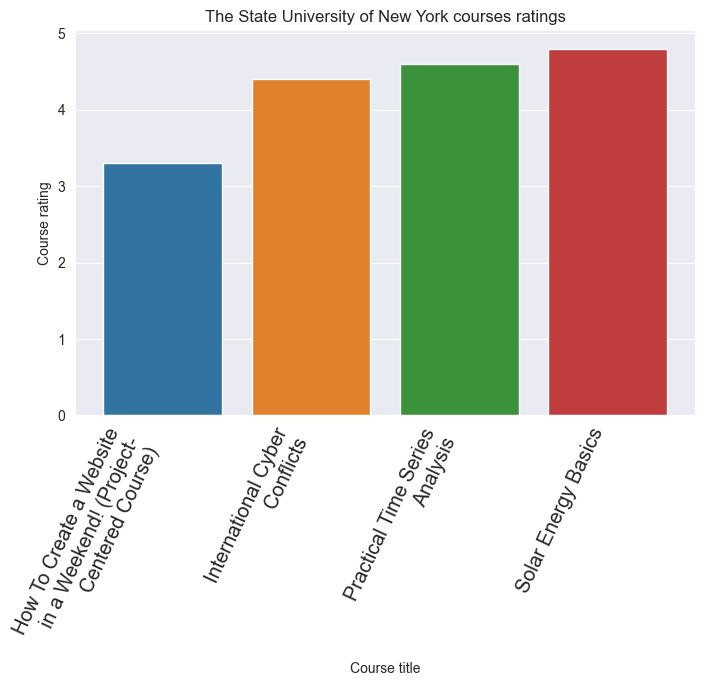

<IPython.core.display.Javascript object>

In [416]:
ny_uni = data.loc[data["course_organization"] == "The State University of New York"]
plot_sns_barplot(
    ny_uni,
    x="course_title",
    y="course_rating",
    x_label="Course title",
    y_label="Course rating",
    title="The State University of New York courses ratings",
    my_figsize=(8, 5),
)

##### Conclusions:
- The mean ratings across courses for each organization are relatively similar, varying from 4.28/5 to 4.9/5
- Organizations with the highest mean rating (4.9) across their courses are:
    - Crece con Google
    - Google - Spectrum Sharing
    - Hebrew University of Jerusalem
    - London Business School
    - Nanyang Technological University, Singapore
    - ScrumTrek
    - Universidade Estadual de Campinas
- Organizations with the lowest mean rating across their courses are:
    - The State University of New York (4.28)
    - New York Institute of Finance (4.3)
    - Tsinghua University (4.3)
- The mean rating of the courses by the State University of New York got thrown off by one of its courses "How To Create a Website in a Weekend!". That course had also the largest number of students enrolled compared to other courses by this organization. The State University of New York could benefit from improving the course curriculum of their most popular course.

#### 3.2.6. What are the most popular words in course titles? 

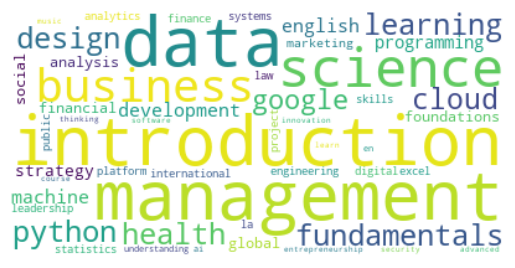

<IPython.core.display.Javascript object>

In [417]:
plot_wordcloud(data)

Let's try the same but with top-50 courses based on the number of students enrolled:

In [418]:
popular_courses = data.nlargest(50, "course_students_enrolled")

<IPython.core.display.Javascript object>

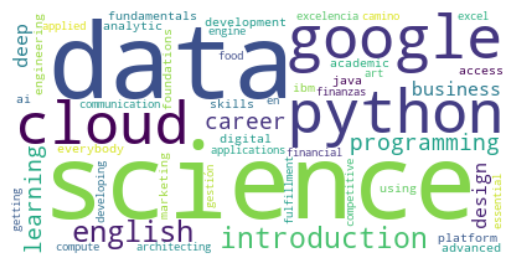

<IPython.core.display.Javascript object>

In [419]:
plot_wordcloud(popular_courses)

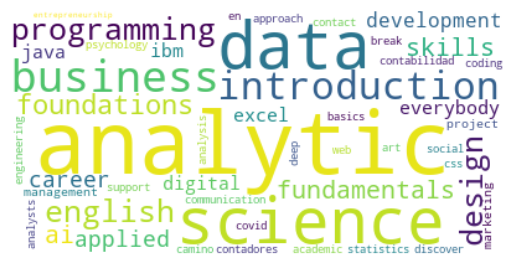

<IPython.core.display.Javascript object>

In [420]:
popular_beginner_courses = beginner_data.nlargest(50, "course_students_enrolled")
plot_wordcloud(popular_beginner_courses)

##### Conclusions:
- Many course titles contain these words connected to data science, business, management, Python, machine learning and others. Also, the most popular word met in course titles is "introduction".
- In the top-50 courses (both all difficulty levels and only beginner level) based on the number of students enrolled, the list of most popular words is a bit different, but not drastically. Most titles in the top-50 contain words connected to analytics, cloud, Google, data science, English, Python and others. But the word "introduction" is no longer the most popular here. So, we may assume that most students don't choose the course based on word "introduction" in its title. 

#### 3.2.7. What are the top courses and organizations in Data Science/ML, Data Analytics/Analysis, Python, and English?

In [421]:
# define lists with words for each topic
ds_words = [
    ["data", "science"],
    ["machine", "learning"],
    ["artificial", "intelligence"],
]
da_words = [["data", "analytics"], ["data", "analysis"]]
py_words = [["python"]]
en_words = [["english"]]

<IPython.core.display.Javascript object>

In [422]:
def get_matched_titles(data, word_list):
    """
    Function to get a Pandas DataFrame only
    with courses that have titles matching
    words in a given list.
    """
    df = data.copy(deep=True)

    # create a regular expression pattern that matches any of the sets of words
    regex_pattern = "|".join(["\W+".join(words) for words in word_list])

    # use the .str.contains() method to check if each string in the 'text' column contains the regex
    filtered_df = df[
        df["course_title"].str.lower().str.strip().str.contains(regex_pattern)
    ]

    return filtered_df

<IPython.core.display.Javascript object>

In [423]:
# get filtered dataframes based on the topic
ds_df = get_matched_titles(data, ds_words)  # data science/ML related
da_df = get_matched_titles(data, da_words)  # data analytics/analysis
py_df = get_matched_titles(data, py_words)  # Python
en_df = get_matched_titles(data, en_words)  # English

<IPython.core.display.Javascript object>

**Now, let's use the functions from the analysis in previous steps to answer our questions:**

**- What are the top highly rated courses and organizations in Data Science/ML?**

In [424]:
# top-5 highly rated courses in Data Science/ML
get_top_k_courses(ds_df, 5, "largest")

,course_title,course_rating,course_organization,course_students_enrolled
564,Machine Learning,4.9,Stanford University,3200.0
763,Structuring Machine Learning Projects,4.8,deeplearning.ai,220.0
208,Databases and SQL for Data Science,4.7,IBM,110.0
55,Applied Data Science Capstone,4.7,IBM,42.0
671,Process Mining: Data science in Action,4.8,Eindhoven University of Technology,39.0


<IPython.core.display.Javascript object>

In [425]:
# top-5 highly rated organizations in Data Science/ML
get_top_organizations_by_mean_rating(ds_df, 5, "largest")

,course_organization,course_rating
12,Stanford University,4.90
3,Eindhoven University of Technology,4.80
18,deeplearning.ai,4.75
8,MathWorks,4.70
13,Universidad Nacional Autónoma de México,4.70


<IPython.core.display.Javascript object>

**- What are the top highly rated courses and organizations in Data Analytics/Analysis?**

In [426]:
# top-5 highly rated courses in Data Analytics/Analysis
get_top_k_courses(da_df, 5, "largest")

,course_title,course_rating,course_organization,course_students_enrolled
188,Data Analysis with Python,4.7,IBM,110.0
485,Introduction to Data Analysis Using Excel,4.7,Rice University,99.0
80,Bayesian Statistics: From Concept to Data Anal...,4.8,"University of California, Santa Cruz",91.0
189,Data Analytics for Lean Six Sigma,4.8,University of Amsterdam,24.0
610,Modern Big Data Analysis with SQL,4.8,Cloudera,14.0


<IPython.core.display.Javascript object>

In [427]:
# top-5 highly rated organizations in Data Analytics/Analysis
get_top_organizations_by_mean_rating(da_df, 5, "largest")

,course_organization,course_rating
0,Cloudera,4.8
6,University of Amsterdam,4.8
8,"University of California, Santa Cruz",4.8
2,IBM,4.7
3,Imperial College London,4.7


<IPython.core.display.Javascript object>

**- What are the top highly rated courses and organizations in Python?**

In [428]:
# top-5 highly rated courses in Python
get_top_k_courses(py_df, 5, "largest")

,course_title,course_rating,course_organization,course_students_enrolled
674,Programming for Everybody (Getting Started wit...,4.8,University of Michigan,1300.0
684,Python Data Structures,4.9,University of Michigan,420.0
530,Introdução à Ciência da Computação com Python ...,4.9,Universidade de São Paulo,120.0
171,Crash Course on Python,4.8,Google,81.0
508,Introduction to Portfolio Construction and Ana...,4.8,EDHEC Business School,11.0


<IPython.core.display.Javascript object>

In [429]:
# top-5 highly rated organizations in Python
get_top_organizations_by_mean_rating(py_df, 5, "largest")

,course_organization,course_rating
11,Universidade de São Paulo,4.90
0,E-Learning Development Fund,4.80
2,Google,4.73
1,EDHEC Business School,4.70
5,Moscow Institute of Physics and Technology,4.70


<IPython.core.display.Javascript object>

**- What are the top highly rated courses and organizations in English?**

In [430]:
# top-5 highly rated courses in English language
get_top_k_courses(en_df, 5, "largest")

,course_title,course_rating,course_organization,course_students_enrolled
261,English for Career Development,4.8,University of Pennsylvania,760.0
260,English for Business and Entrepreneurship,4.8,University of Pennsylvania,230.0
780,"TESOL Certificate, Part 1: Teach English Now!",4.9,Arizona State University,100.0
782,Teach English Now! Foundational Principles,4.9,Arizona State University,81.0
781,"TESOL Certificate, Part 2: Teach English Now!",4.9,Arizona State University,62.0


<IPython.core.display.Javascript object>

In [431]:
# top-5 highly rated organizations in English language
get_top_organizations_by_mean_rating(en_df, 5, "largest")

,course_organization,course_rating
7,University of Pennsylvania,4.80
0,Arizona State University,4.76
8,University of Washington,4.70
2,Georgia Institute of Technology,4.67
5,"University of California, Irvine",4.67


<IPython.core.display.Javascript object>

##### Conclusions:
Based on the filtered data above, we can see what courses and organizations stand out in certain fields of interest.

1) - The most highly rated and most popular **Data Science/ML** courses are:
        - Machine Learning (4.9) by Stanford University	
        - Structuring Machine Learning Projects (4.8) by deeplearning.ai
   - These organizations had the highest mean rating across their Data Science/ML courses:
        - Stanford University (4.90)
        - Eindhoven University of Technology (4.80)
        - deeplearning.ai (4.75)
2) - The most highly rated and most popular **Data Analytics/Analysis** courses are:
        - Data Analysis with Python	(4.7) by IBM
        - Introduction to Data Analysis Using Excel	(4.7) by Rice University
        - Bayesian Statistics: From Concept to Data Analysis (4.8) by University of California, Santa Cruz
   - These organizations had the highest mean rating across their Data Analytics/Analysis courses:
        - Cloudera (4.8)
        - University of Amsterdam (4.8)
        - University of California, Santa Cruz (4.8)
3) - The most highly rated and most popular **Python** courses are:
        - Programming for Everybody (Getting Started with Python) (4.8) by University of Michigan
        - Introdução à Ciência da Computação com Python	(4.9) by Universidade de São Paulo
        - Crash Course on Python (4.8) by Google
   - These organizations had the highest mean rating across their Python courses:
        - Universidade de São Paulo (4.90)
        - E-Learning Development Fund (4.80)
        - Google (4.73)
4) - The most highly rated and most popular **English** courses are:
        - English for Career Development (4.8) by University of Pennsylvania	
        - English for Business and Entrepreneurship	(4.8) by University of Pennsylvania	
        - TESOL Certificate, Part 1: Teach English Now!	(4.9) by Arizona State University
   - These organizations had the highest mean rating across their English courses:
        - University of Pennsylvania (4.80)
        - Arizona State University (4.76)
        - University of Washington (4.70)

### 3.3. Further Exploration of Correlations and Connections

#### 3.3.0. Defining functions for further visualizations:

In [432]:
def plot_sns_jointplot(
    data, x: str, y: str, title: str, xlim=(-20, 850), ylim=(3, 5.1), my_figsize=(8, 5)
):
    """
    Function to automate seaborn
    jointplot plotting.
    """
    g = sns.JointGrid(data, x=x, y=y)
    g.plot_joint(sns.scatterplot, s=100, alpha=0.5)
    g.ax_marg_x.set_xlim(*xlim)
    g.ax_marg_y.set_ylim(*ylim)
    g.plot_marginals(sns.histplot, kde=True)
    g.fig.set_size_inches(my_figsize)
    g.fig.suptitle(title)

    g.fig.show()

<IPython.core.display.Javascript object>

#### 3.3.1. Are course ratings and the number of enrolled students correlated?

In [433]:
def get_corr_scores(data):
    """
    Function to get all the
    Pearson correlation scores
    for numeric columns.
    """
    # create a dataframe with correlations
    corr_data = data.corr(numeric_only=True, method="pearson")

    # Retain upper triangular values of correlation matrix and
    # make Lower triangular values Null
    upper_corr_data = corr_data.where(
        np.triu(np.ones(corr_data.shape), k=1).astype(bool)
    )

    # Convert to 1-D series and drop Null values
    unique_corr_pairs = upper_corr_data.unstack().dropna()

    # Sort correlation pairs
    sorted_corr_data = unique_corr_pairs.drop_duplicates()
    sorted_corr_data.sort_index(inplace=True)

    return sorted_corr_data

<IPython.core.display.Javascript object>

/var/folders/4d/71xyxg0j2x997qs8vr55rlwr0000gn/T/ipykernel_26000/1208522435.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



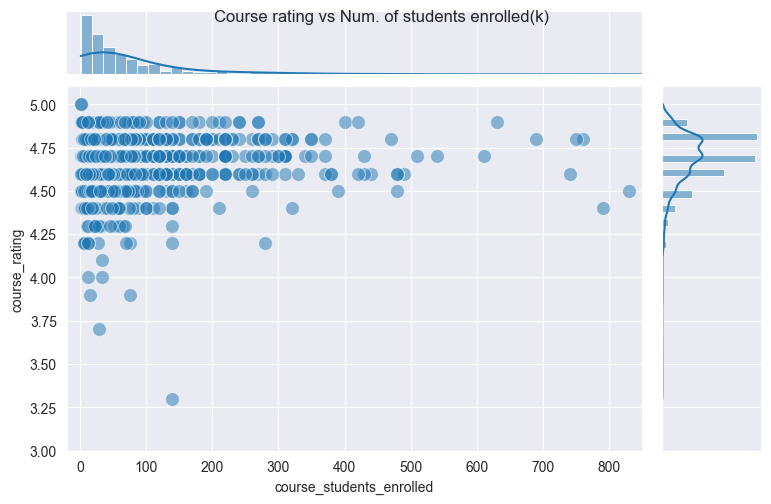

<IPython.core.display.Javascript object>

In [434]:
plot_sns_jointplot(
    data,
    x="course_students_enrolled",
    y="course_rating",
    title="Course rating vs Num. of students enrolled(k)",
)

In [435]:
get_corr_scores(data)  # get correlation score

course_students_enrolled  course_rating    0.07109
dtype: float64

<IPython.core.display.Javascript object>

/var/folders/4d/71xyxg0j2x997qs8vr55rlwr0000gn/T/ipykernel_26000/1208522435.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



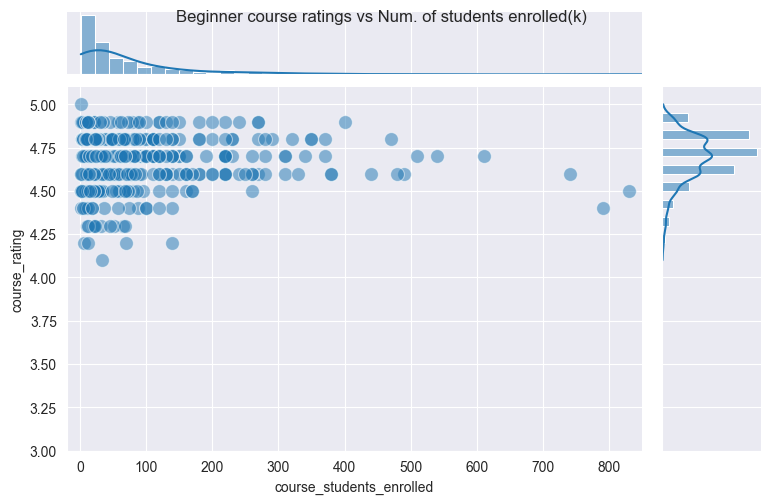

<IPython.core.display.Javascript object>

In [436]:
plot_sns_jointplot(
    beginner_data,
    x="course_students_enrolled",
    y="course_rating",
    title="Beginner course ratings vs Num. of students enrolled(k)",
)

In [437]:
get_corr_scores(beginner_data)  # get correlation score for beginner data

course_students_enrolled  course_rating    0.00542
dtype: float64

<IPython.core.display.Javascript object>

##### Conclusions:
- Having analyzed the Pearson correlation score, the correlation between the course rating and the number of students enrolled is statistically insignificant. 
- Also, based on the jointplot above, there is no correlation between the number of enrolled students and course ratings (both all difficulty levels and only beginner courses). We can assume that the popularity of the course doesn't really influence its rate and vice versa.

#### 3.3.2. What difficulty levels get more students enrolled in its courses?

Text(0.5, 1.0, 'Distribution of enrolled students across all difficulty levels')

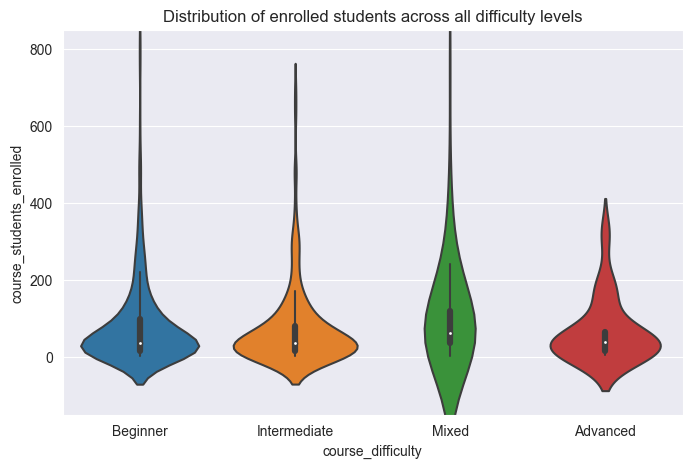

<IPython.core.display.Javascript object>

In [438]:
plt.figure(figsize=(8, 5))
ax = sns.violinplot(x=data["course_difficulty"], y=data["course_students_enrolled"])
ax.set_ylim(-150, 850)
ax.set_title("Distribution of enrolled students across all difficulty levels")

##### Conclusions:
- All four difficulty levels get similar distribution of the number of enrolled students.
- Beginner, Mixed, and Intermediate levels have significant outliers in the number of students enrolled. It seems like there are a few popular courses with these difficulty levels.
- Courses with the mixed difficulty level on average have more students.

## Conclusions, Biases and Further Analysis

### Conclusions:

Based on the visualizations and analysis above, we can draw these conclusions:
- The dataset doesn't contain missing values or duplicates.
- The majority of courses have Beginner difficulty level.
- The majority of courses have high rating (>4.5).
- Mixed difficulty level courses tend to have more students enrolled on average.
- The titles of the most popular courses contain words connected to data science, analytics, Python, management, English skills.
- There is no correlation between the course rating and number of students enrolled.
- The most popular type is Course, and Specialization comes second.
- The State University of New York could improve its overall rating by improving its most popular course. 

### Biases:
- The size of the dataset is small, thus its possible we get the wrong idea about the whole population of Coursera corses.
- There are courses in different languages, and thus, with different learner audiences. Analyzing all of them together may lead us to wrong conclusions about certain course organizations.
- Course rating may not be the best signifier of course quality. It would also be better to get the success rate for each course.

### Further Analysis:
- This dataset could be useful for course creators, learners, and Coursera marketers. Having the statistics about course ratings, most popular topics and levels, we can see what Coursera audience wants the most. 
Also, this dataset could potentially be used for a course recommendantion system. Though, knowing more about the learners would help to personalize the recommendations.